In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns

This dataset is a collection of the system permissions of Android apps, with the *Result* column indicating whether the app is malware.

In [2]:
perms = pd.read_csv("android_permissions.csv")
perms.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## 1.
(3.1)
Let `X` be a feature frame found by dropping the *Result* column, and let `y` be the *Result* column.

In [3]:
X, y = None, None

X = perms.drop(columns=['Result'])

y = perms['Result']

In [4]:
X.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

In [6]:
# TESTS
assert X.shape == (29332, 86), "X has the wrong shape"
assert y.sum() == 14700, "y has the wrong values"
assert X["android.permission.BLUETOOTH"].sum() == 1219, "Something is wrong with the data in X"
print("OK")

OK


## 2. 

(3.2)
Split the dataset, reserving 20% of it as `X_test,y_test` for testing and the rest as `X_train,y_train` for training. 

**IMPORTANT**: Make sure the split order is randomized starting from random state 3383.

In [7]:
from sklearn.model_selection import train_test_split
X_train, y_train = None, None
X_test, y_test = None, None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3383
)

In [8]:
X_test.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS
20030,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19007,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23624,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8639,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# TESTS
assert len(X_train) == 23465, "X_train has the wrong number of rows"
assert X_test.iloc[:, 10].sum() == 67, "X_test has the wrong rows or columns"
assert y_train.sum() == 11749, "y_train has the wrong rows"
print("OK")

OK


## 3.

(3.3) Train a decision tree classifier with maximum depth 12 on the training set. **Make sure to set its random state equal to 302.** Find the accuracy of the decision tree on the test set.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=12, random_state=302)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

acc = accuracy_score(y_test, y_pred)

acc


0.9590932333390149

In [11]:
print(f"Decision tree accuracy is {acc:.3%}")

Decision tree accuracy is 95.909%


In [12]:
# TESTS
assert 0.94 < acc < 0.97, "Incorrect accuracy score"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 4.

(3.5) Find the probability, according to the decision tree, that the app in the first row of `X_test` is malware.

In [18]:
mal = None
mal = dtree.predict_proba(X_test.iloc[[0]])[:, 1][0] 




In [19]:
print(f"Probability of malware is {mal:.2%}")

Probability of malware is 98.05%


In [20]:
# TESTS
assert mal > 0.93, "Prediction is incorrect"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 5.

(3.5) Plot the ROC curve over the test set for predicting malware (i.e, when *Result* equals 1).

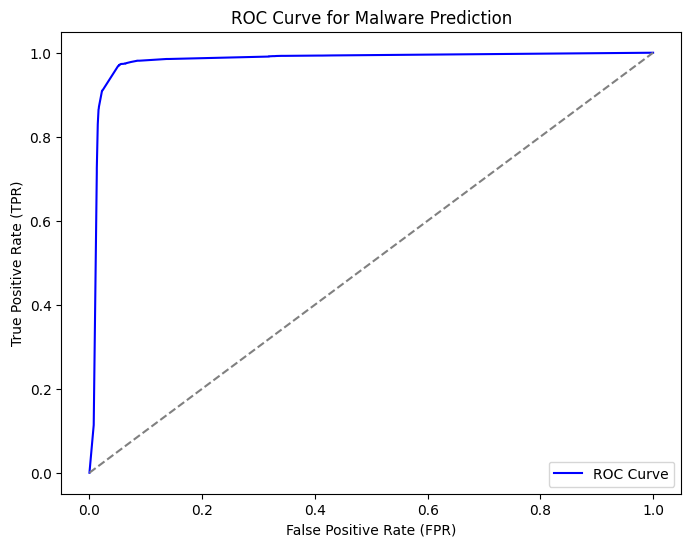

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get probability scores for the malware class (1)
y_scores = dtree.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Malware Prediction")
plt.legend()
plt.show()


## 6. 

(3.5) Find the AUC score for the ROC curve.

In [22]:
from sklearn.metrics import roc_auc_score
AUC = None
AUC = roc_auc_score(y_test, y_scores)
print(f"AUC Score: {AUC:.4f}")


AUC Score: 0.9801


In [23]:
print(f"AUC score is {AUC:.5f}")

AUC score is 0.98008


In [24]:
# TESTS
assert 1 > AUC > 0.95, "AUC is incorrect"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete